# Mini Project Result

We have generated a dataset of 10446 rows.
Our method to find the average time period between infected to recovered state is as follows:-
- First of all we find the time difference between the first tweet and the last tweet of a particular hashtag of a particular user.
- Then we add these differences for that user and find the avg time period between the first tweet and the last tweet for that user (average time period between infected to recovered state) by dividing the sum of differences by the no. of hashtags.
- Then we do the first two steps for n users and find the final average time period between the first and the last tweet by dividing the avg difference for each user by n.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [2]:
df= pd.read_csv('scraped_tweets.csv')
df

,Unnamed: 0,username,hashtag,difference,times of all tweets
0,0,imsurya95,BoycottbollywoodCompletely,0 days 00:00:00,"[datetime.datetime(2022, 9, 6, 7, 19, 36, tzin..."
1,1,aravindarajm005,2point0,1 days 02:48:57,"[datetime.datetime(2022, 12, 28, 16, 2, 30, tz..."
2,2,aravindarajm005,Kabali,0 days 00:00:00,"[datetime.datetime(2022, 12, 28, 16, 2, 30, tz..."
3,3,aravindarajm005,Jailer,0 days 07:59:26,"[datetime.datetime(2022, 12, 27, 13, 28, 40, t..."
4,4,aravindarajm005,Rajinikanth,0 days 07:59:26,"[datetime.datetime(2022, 12, 27, 13, 28, 40, t..."
...,...,...,...,...,...
10441,10441,rrahulforever_,RraMaan,0 days 00:00:00,"[datetime.datetime(2022, 12, 3, 13, 31, 35, tz..."
10442,10442,rrahulforever_,FahmaanKhan,0 days 00:00:00,"[datetime.datetime(2022, 11, 28, 19, 42, 56, t..."
10443,10443,naveenlakkamraj,HBDYSJagan,0 days 00:07:25,"[datetime.datetime(2022, 12, 20, 12, 21, 50, t..."
10444,10444,naveenlakkamraj,JayahoBC,0 days 00:00:00,"[datetime.datetime(2022, 12, 7, 4, 17, 36, tzi..."


In [3]:
df['difference'] = df['difference'].apply(lambda x: pd.to_timedelta(x).total_seconds())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10446 entries, 0 to 10445
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10446 non-null  int64  
 1   username             10446 non-null  object 
 2   hashtag              10446 non-null  object 
 3   difference           10446 non-null  float64
 4   times of all tweets  10446 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 408.2+ KB


<AxesSubplot: xlabel='difference'>

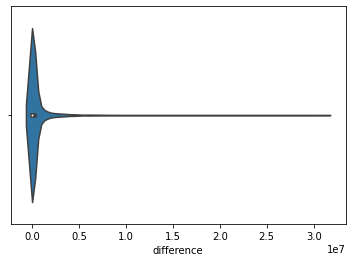

In [4]:
sns.violinplot(data=df, x="difference")

In [5]:
s= df["difference"]
df_mean = df.groupby(['username'])['difference'].mean().mean()
df_std = np.std(df["difference"])
median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
IQR = q3 - q1
df_mean, df_std, median,q1,q3

(369686.77124012046, 2093720.1664032387, 422.0, 0.0, 172526.0)

- Our **average time period** is 369686.77 seconds which is **4.28 days**.
- **Standard deviation** is 2093720.166 seconds which is **24.23 days**.
- **Median** of the dataset is 422 seconds which is **7.03 minutes**.
- **1st Quartile** is **0 days** and **3rd quartile** is 172526 seconds which is **1.996 days**.

In [6]:
se = 0
for index, row in df.iterrows():
    se += (row["difference"] - df_mean) ** 2
error = se/ (len(df) - 2)
error** 0.5

2103231.399366359

**Standard error with mean including outliers** is 2103231.399 which is **24.34 hours**. 

### After Removing Outliers

In [7]:
df = df[~((df['difference'] < (q1 - 1.5 * IQR)) |(df['difference'] > (q3 + 1.5 * IQR)))]
df

,Unnamed: 0,username,hashtag,difference,times of all tweets
0,0,imsurya95,BoycottbollywoodCompletely,0.0,"[datetime.datetime(2022, 9, 6, 7, 19, 36, tzin..."
1,1,aravindarajm005,2point0,96537.0,"[datetime.datetime(2022, 12, 28, 16, 2, 30, tz..."
2,2,aravindarajm005,Kabali,0.0,"[datetime.datetime(2022, 12, 28, 16, 2, 30, tz..."
3,3,aravindarajm005,Jailer,28766.0,"[datetime.datetime(2022, 12, 27, 13, 28, 40, t..."
4,4,aravindarajm005,Rajinikanth,28766.0,"[datetime.datetime(2022, 12, 27, 13, 28, 40, t..."
...,...,...,...,...,...
10441,10441,rrahulforever_,RraMaan,0.0,"[datetime.datetime(2022, 12, 3, 13, 31, 35, tz..."
10442,10442,rrahulforever_,FahmaanKhan,0.0,"[datetime.datetime(2022, 11, 28, 19, 42, 56, t..."
10443,10443,naveenlakkamraj,HBDYSJagan,445.0,"[datetime.datetime(2022, 12, 20, 12, 21, 50, t..."
10444,10444,naveenlakkamraj,JayahoBC,0.0,"[datetime.datetime(2022, 12, 7, 4, 17, 36, tzi..."


After removing outliers from our dataset we have **8532 rows** out of **10446 rows.** 

In [8]:

s= df["difference"]
df_mean = df.groupby(['username'])['difference'].mean().mean()
df_std = np.std(df["difference"])
median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
IQR = q3 - q1
df_mean, df_std, median,q1,q3, df['difference'].max()

(31707.611483438668, 84528.40740128017, 0.0, 0.0, 10945.0, 431181.0)

- Our **average time period** is 31707.611 seconds which is **0.37 days**.
- **Standard deviation** is 84528.407 seconds which is **0.98 days**.
- **Median** of the dataset is **0 days**.
- **1st Quartile** is **0 days** and **3rd quartile** is 10945 seconds which is **0.127 days**.

In [9]:
se = 0
for index, row in df.iterrows():
    se += (row["difference"] - df_mean) ** 2
error = se/ (len(df) - 2)
error** 0.5

84629.15540140562

**Standard error** of the dataset without outliers is 84629.15 seconds which is **0.979 day**